# Deep Learning Project Using Keras , TensorFlow and Sci-kit Learn:

Importing wine quality data from UCI archives:

In [4]:
# Import pandas 
import pandas as pd

# Read in white wine data 
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

# Read in red wine data 
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

In [5]:
# Print info on white wine
print(white.info())

# Print info on red wine
print(red.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null fl

In [6]:
# Describe `white`
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### Exploring Data to see patterns:

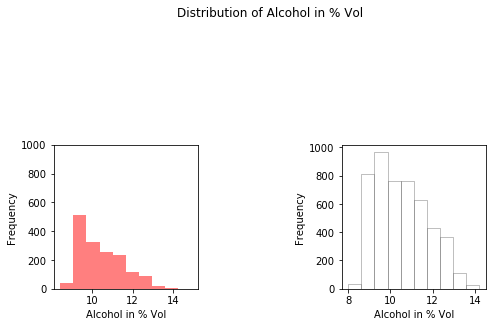

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2)

ax[0].hist(red.alcohol, 10, facecolor='red', alpha=0.5, label="Red wine")
ax[1].hist(white.alcohol, 10, facecolor='white', ec="black", lw=0.5, alpha=0.5, label="White wine")

fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=1)
ax[0].set_ylim([0, 1000])
ax[0].set_xlabel("Alcohol in % Vol")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("Alcohol in % Vol")
ax[1].set_ylabel("Frequency")
#ax[0].legend(loc='best')
#ax[1].legend(loc='best')
fig.suptitle("Distribution of Alcohol in % Vol")

plt.show()

In [8]:
import numpy as np
print(np.histogram(red.alcohol, bins=[7,8,9,10,11,12,13,14,15]))
print(np.histogram(white.alcohol, bins=[7,8,9,10,11,12,13,14,15]))

(array([  0,   7, 673, 452, 305, 133,  21,   8], dtype=int64), array([ 7,  8,  9, 10, 11, 12, 13, 14, 15]))
(array([   0,  317, 1606, 1256,  906,  675,  131,    7], dtype=int64), array([ 7,  8,  9, 10, 11, 12, 13, 14, 15]))


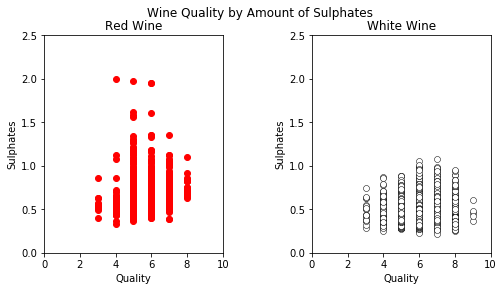

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].scatter(red['quality'], red["sulphates"], color="red")
ax[1].scatter(white['quality'], white['sulphates'], color="white", edgecolors="black", lw=0.5)

ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlabel("Quality")
ax[1].set_xlabel("Quality")
ax[0].set_ylabel("Sulphates")
ax[1].set_ylabel("Sulphates")
ax[0].set_xlim([0,10])
ax[1].set_xlim([0,10])
ax[0].set_ylim([0,2.5])
ax[1].set_ylim([0,2.5])
fig.subplots_adjust(wspace=0.5)
fig.suptitle("Wine Quality by Amount of Sulphates")

plt.show()

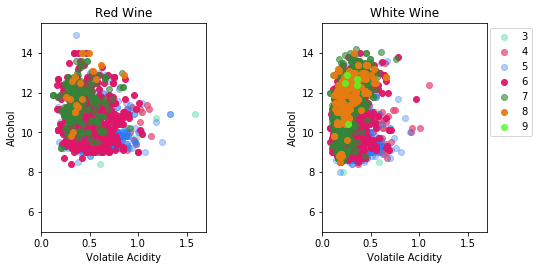

In [10]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(570)

redlabels = np.unique(red['quality'])
whitelabels = np.unique(white['quality'])

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
redcolors = np.random.rand(6,4)
whitecolors = np.append(redcolors, np.random.rand(1,4), axis=0)

for i in range(len(redcolors)):
    redy = red['alcohol'][red.quality == redlabels[i]]
    redx = red['volatile acidity'][red.quality == redlabels[i]]
    ax[0].scatter(redx, redy, c=redcolors[i])
for i in range(len(whitecolors)):
    whitey = white['alcohol'][white.quality == whitelabels[i]]
    whitex = white['volatile acidity'][white.quality == whitelabels[i]]
    ax[1].scatter(whitex, whitey, c=whitecolors[i])
    
ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlim([0,1.7])
ax[1].set_xlim([0,1.7])
ax[0].set_ylim([5,15.5])
ax[1].set_ylim([5,15.5])
ax[0].set_xlabel("Volatile Acidity")
ax[0].set_ylabel("Alcohol")
ax[1].set_xlabel("Volatile Acidity")
ax[1].set_ylabel("Alcohol") 
#ax[0].legend(redlabels, loc='best', bbox_to_anchor=(1.3, 1))
ax[1].legend(whitelabels, loc='best', bbox_to_anchor=(1.3, 1))
#fig.suptitle("Alcohol - Volatile Acidity")
fig.subplots_adjust(top=0.85, wspace=0.7)

plt.show()

In [6]:
# Add `type` column to `red` with value 1
red['type'] = 1

# Add `type` column to `white` with value 0
white['type'] = 0

# Append `white` to `red`
wines = red.append(white, ignore_index=True)

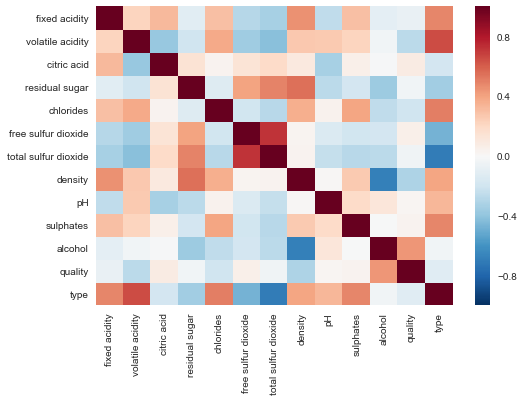

In [7]:
import seaborn as sns
corr = wines.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.show()

### Separating Training and testing data:

In [11]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split
import numpy as np

# Specify the data 
X=wines.iloc[:,0:11]
print (X)

# Specify the target labels and flatten the array 
y=np.ravel(wines.type)
print (y)

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00            1.90      0.076   
1               7.8             0.880         0.00            2.60      0.098   
2               7.8             0.760         0.04            2.30      0.092   
3              11.2             0.280         0.56            1.90      0.075   
4               7.4             0.700         0.00            1.90      0.076   
5               7.4             0.660         0.00            1.80      0.075   
6               7.9             0.600         0.06            1.60      0.069   
7               7.3             0.650         0.00            1.20      0.065   
8               7.8             0.580         0.02            2.00      0.073   
9               7.5             0.500         0.36            6.10      0.071   
10              6.7             0.580         0.08            1.80      0.097   
11              7.5         

### Scaling the data:

In [12]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

### Importing Keras and defining model parameters:

In [13]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(12, activation='relu', input_shape=(11,)))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [14]:
# Model output shape
model.output_shape

(None, 1)

In [15]:
# Model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Model config
model.get_config()

[{'class_name': 'Dense',
  'config': {'activation': 'relu',
   'activity_regularizer': None,
   'batch_input_shape': (None, 11),
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'dtype': 'float32',
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'config': {'distribution': 'uniform',
     'mode': 'fan_avg',
     'scale': 1.0,
     'seed': None}},
   'kernel_regularizer': None,
   'name': 'dense_1',
   'trainable': True,
   'units': 12,
   'use_bias': True}},
 {'class_name': 'Dense',
  'config': {'activation': 'relu',
   'activity_regularizer': None,
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'config': {'distribution': 'uniform',
     'mode': 'fan_avg',
     'scale': 1.0,
     'seed': None}},
   'kernel_re

## getting all weights tensors

In [17]:
# List all weight tensors 
model.get_weights()

[array([[ 0.2129032 , -0.32952249, -0.09389287,  0.4317103 , -0.38420719,
          0.47876287, -0.06868958,  0.12355393, -0.34439856,  0.17104208,
         -0.02920815, -0.01884684],
        [ 0.39585543,  0.2817784 , -0.02299055, -0.36981884, -0.06761009,
          0.25749862, -0.13644812, -0.27937847,  0.35344911,  0.11257595,
          0.30552548,  0.40886688],
        [ 0.18913656, -0.432345  ,  0.08934903, -0.00870812, -0.03533629,
          0.24203598, -0.11704537, -0.23397046, -0.41741681,  0.00195241,
          0.0550862 , -0.19109362],
        [-0.40703177,  0.04769468,  0.04347461, -0.2870146 , -0.34584692,
         -0.30257601, -0.47768933, -0.48892146,  0.21782988, -0.02530521,
         -0.17371342, -0.4595719 ],
        [-0.2395272 , -0.3286618 ,  0.44324702,  0.45650357, -0.35244885,
         -0.19318688,  0.1557824 , -0.32127783,  0.42175972, -0.25173095,
         -0.2632798 ,  0.35526818],
        [-0.00171846, -0.1242893 ,  0.00091672, -0.27849644, -0.03039789,
      

In [18]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X_train, y_train,epochs=20, batch_size=1, verbose=1)

Epoch 1/20
4352/4352 [==============================] - 6s - loss: 0.1054 - acc: 0.9625     
Epoch 2/20
4352/4352 [==============================] - 4s - loss: 0.0278 - acc: 0.9943     
Epoch 3/20
4352/4352 [==============================] - 6s - loss: 0.0221 - acc: 0.9952     
Epoch 4/20
4352/4352 [==============================] - 7s - loss: 0.0183 - acc: 0.9959     
Epoch 5/20
4352/4352 [==============================] - 6s - loss: 0.0181 - acc: 0.9959     
Epoch 6/20
4352/4352 [==============================] - 6s - loss: 0.0155 - acc: 0.9963     - ETA: 1s - loss: 0.0155 - acc: 0.995 - ETA: 1
Epoch 7/20
4352/4352 [==============================] - 7s - loss: 0.0141 - acc: 0.9968     
Epoch 8/20
4352/4352 [==============================] - 7s - loss: 0.0136 - acc: 0.9966     
Epoch 9/20
4352/4352 [==============================] - 7s - loss: 0.0128 - acc: 0.9972     - ETA: 2s - loss: 0.0137 - acc: - ETA
Epoch 10/20
4352/4352 [==============================] - 7s - loss: 0.0114 - acc

In [39]:
y_pred_float = model.predict(X_test)
y_pred_round = np.rint(y_pred_float)
y_pred_round[:5]

array([[ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.]], dtype=float32)

In [40]:
y_pred_int = np.asarray(y_pred_round, dtype=int)
y_pred_int[:5]

array([[0],
       [1],
       [0],
       [0],
       [0]])

In [21]:
y_test[:5]

array([0, 1, 0, 0, 0], dtype=int64)

In [25]:
score = model.evaluate(X_test, y_test,verbose=1)
print(score)

2144/2145 [============================>.] - ETA: 0s[0.027040664810906567, 0.99533799533799538]


### Performance Metrics

In [41]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
confusion_matrix(y_test, y_pred_int)

array([[1586,    2],
       [   8,  549]])

In [42]:
precision_score(y_test, y_pred_int)

0.99637023593466423

In [43]:
recall_score(y_test, y_pred)

0.98563734290843807

In [44]:
f1_score(y_test,y_pred)

0.99097472924187735

In [45]:
cohen_kappa_score(y_test, y_pred)

0.98783217592461281

# Predicting Quality instead of Type:

### Pre-processing Data:

In [46]:
# Isolate target labels
y = wines.quality

# Isolate data
X = wines.drop('quality', axis=1) 

In [47]:
# Scale the data with `StandardScaler`
X = StandardScaler().fit_transform(X)

In [48]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the model
model = Sequential()

# Add input layer 
model.add(Dense(64, input_dim=12, activation='relu'))
    
# Add output layer 
model.add(Dense(1))

### Splitting Data into K-Folds, Compiling The Model and Fitting:

In [51]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

seed = 7
np.random.seed(seed) # to generate a predictable random number

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train, test in kfold.split(X, y):
    model = Sequential()
    model.add(Dense(64, input_dim=12, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    model.fit(X[train], y[train], epochs=10, verbose=1)

Epoch 1/10
5195/5195 [==============================] - 7s - loss: 14.2926 - mean_absolute_error: 3.3590     
Epoch 2/10
5195/5195 [==============================] - 0s - loss: 1.6252 - mean_absolute_error: 0.9938     
Epoch 3/10
5195/5195 [==============================] - 0s - loss: 1.0007 - mean_absolute_error: 0.7738     
Epoch 4/10
5195/5195 [==============================] - 0s - loss: 0.7487 - mean_absolute_error: 0.6667     
Epoch 5/10
5195/5195 [==============================] - 0s - loss: 0.6337 - mean_absolute_error: 0.6158     
Epoch 6/10
5195/5195 [==============================] - 0s - loss: 0.5717 - mean_absolute_error: 0.5860     
Epoch 7/10
5195/5195 [==============================] - 0s - loss: 0.5392 - mean_absolute_error: 0.5709     
Epoch 8/10
5195/5195 [==============================] - 0s - loss: 0.5209 - mean_absolute_error: 0.5610     
Epoch 9/10
5195/5195 [==============================] - 0s - loss: 0.5098 - mean_absolute_error: 0.5564     
Epoch 10/10
5195/5

### Predicting the outcome:

In [55]:
y_pred_float = model.predict(X[test])
y_pred_round = np.rint(y_pred_float)
y_pred_int = np.asarray(y_pred_round, dtype=int)
y_pred_int

array([[5],
       [5],
       [5],
       ..., 
       [6],
       [6],
       [5]])

### Evaluating the Model:

In [62]:
from sklearn.metrics import r2_score
mse_value, mae_value = model.evaluate(X[test], y[test], verbose=0)

print('MAE Value: ', mse_value)
print('MSE Value: ', mae_value)
print ('R2 Score: ', r2_score(y[test], y_pred))

MAE Value:  0.516973164004
MSE Value:  0.557339488357
R2 Score:  0.313802556719


Above performance indicators are not very good hence now we have to tune the model.
First I add and intermediate layer.

In [64]:
seed = 7
np.random.seed(seed) # to generate a predictable random number

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train, test in kfold.split(X, y):
    model = Sequential()
    model.add(Dense(64, input_dim=12, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    model.fit(X[train], y[train], epochs=10, verbose=0)
    
y_pred_float = model.predict(X[test])
y_pred_round = np.rint(y_pred_float)
y_pred_int = np.asarray(y_pred_round, dtype=int)

mse_value, mae_value = model.evaluate(X[test], y[test], verbose=0)

print('MAE Value: ', mse_value)
print('MSE Value: ', mae_value)
print ('R2 Score: ', r2_score(y[test], y_pred))

MAE Value:  0.515896319424
MSE Value:  0.557143074279
R2 Score:  0.313802556719


Performance values have not changed, lets try to change the number of units for each layer instead.

In [65]:
seed = 7
np.random.seed(seed) # to generate a predictable random number

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train, test in kfold.split(X, y):
    model = Sequential()
    model.add(Dense(128, input_dim=12, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    model.fit(X[train], y[train], epochs=10, verbose=0)
    
y_pred_float = model.predict(X[test])
y_pred_round = np.rint(y_pred_float)
y_pred_int = np.asarray(y_pred_round, dtype=int)

mse_value, mae_value = model.evaluate(X[test], y[test], verbose=0)

print('MAE Value: ', mse_value)
print('MSE Value: ', mae_value)
print ('R2 Score: ', r2_score(y[test], y_pred))

MAE Value:  0.518004917257
MSE Value:  0.563017440146
R2 Score:  0.313802556719


Now trying to tune the Learning Rate parameter in RMSProp optimizer from Keras

In [66]:
from keras.optimizers import RMSprop

rmsprop = RMSprop(lr=0.0001)
seed = 7
np.random.seed(seed) # to generate a predictable random number

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train, test in kfold.split(X, y):
    model = Sequential()
    model.add(Dense(128, input_dim=12, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=rmsprop, loss='mse', metrics=['mae'])
    model.fit(X[train], y[train], epochs=10, verbose=0)
    
y_pred_float = model.predict(X[test])
y_pred_round = np.rint(y_pred_float)
y_pred_int = np.asarray(y_pred_round, dtype=int)

mse_value, mae_value = model.evaluate(X[test], y[test], verbose=0)

print('MAE Value: ', mse_value)
print('MSE Value: ', mae_value)
print ('R2 Score: ', r2_score(y[test], y_pred))

MAE Value:  1.42596123185
MSE Value:  0.949202697463
R2 Score:  0.313802556719


Now trying to apply SGD optimizer to see if the performance increases.

In [67]:
from keras.optimizers import SGD, RMSprop

sgd=SGD(lr=0.1)
seed = 7
np.random.seed(seed) # to generate a predictable random number

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train, test in kfold.split(X, y):
    model = Sequential()
    model.add(Dense(128, input_dim=12, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=sgd, loss='mse', metrics=['mae'])
    model.fit(X[train], y[train], epochs=10, verbose=0)
    
y_pred_float = model.predict(X[test])
y_pred_round = np.rint(y_pred_float)
y_pred_int = np.asarray(y_pred_round, dtype=int)

mse_value, mae_value = model.evaluate(X[test], y[test], verbose=0)

print('MAE Value: ', mse_value)
print('MSE Value: ', mae_value)
print ('R2 Score: ', r2_score(y[test], y_pred))

MAE Value:  0.511899275052
MSE Value:  0.559370650359
R2 Score:  0.313802556719
